<a href="https://colab.research.google.com/github/CoolerKula/Recurrent-Neural-Networks-Project/blob/main/Recurrent_Neural_Networks_with_Python_Project_Bernard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>AfterWork Data Science: Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [8]:
# Importing standard libraries
# ---
# 
import pandas as pd               # library for data manipulation
import numpy as np                # library for scientific computations
import matplotlib.pyplot as plt   # library for data visualisation 

In [9]:
# Importing our dataset
# ---
#
train_df = pd.read_csv('https://bit.ly/38dSbSb')
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [10]:
# Sample dataset
# ---
#
train_df.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
1062,2016-03-24,43.155998,45.778,43.0,45.549999,45.549999,24804500


In [11]:
# Statistical summary
# ---
#
train_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [12]:
# Getting our train dataset
# ---
#
train_set = train_df.iloc[:, 1:2].values
print(train_set)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]


In [13]:
# Performing Feature scaling
# ---
#
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled)

[[0.00888719]
 [0.00609079]
 [0.00436698]
 ...
 [0.74663857]
 [0.73526148]
 [0.72660406]]


In [14]:
# Creating a dataset with 60 timesteps and 1 output
# ---
#
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
# Reshaping 
# ---
#
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [16]:
# Building the RNN
# ---
#
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
# Initialising the RNN
# ---
#
regressor = Sequential()

# Adding 4 LSTM layers and some Dropout regularisation
# ---
#
regressor.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
# ---
#
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
# ---
#
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# ---
# 'return_sequences' is False as we will not add more LSTM layers after this one.
# ---
regressor.add(LSTM(units = 200, return_sequences = False))
regressor.add(Dropout(0.2))

# Adding the output layer
# ---
#
regressor.add(Dense(units = 1))

In [18]:
# Compile the RNN 
# ---
#
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
# Fitting the RNN to the training set
# ---
#
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 60ms/step - loss: 0.0485
Epoch 2/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0090
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0078
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0075
Epoch 5/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0073
Epoch 6/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0066
Epoch 7/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0063
Epoch 8/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0071
Epoch 9/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0068
Epoch 10/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0058
Epoch 11/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0053
Epoch 12/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0056
Epoch 13/100
38/38 [====

In [20]:
# We will now making the predictions but we have to import our Test Dataset
# ---
#

# Getting the Test Dataset
# ---
#
test_df = pd.read_csv('https://bit.ly/3kW8E0K')
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
1,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
3,2020-01-09,99.419998,99.760002,94.573997,96.267998,96.267998,142202000
4,2020-01-10,96.358002,96.987999,94.739998,95.629997,95.629997,64797500


In [27]:
# Getting Test Dataset feature values
# ---
# NB: We are using the 'Open' feature
# ---
#
real_stock_price = test_df.iloc[:, 1:2].values
print(real_stock_price)

[[ 88.094002]
 [ 92.279999]
 [ 94.739998]
 [ 99.419998]
 [ 96.358002]
 [ 98.699997]
 [108.851997]
 [105.952003]
 [ 98.75    ]
 [101.522003]
 [106.050003]
 [114.377998]
 [112.849998]
 [114.125999]
 [108.398003]
 [113.697998]
 [115.138   ]
 [126.484001]
 [128.      ]
 [134.738007]
 [176.591995]
 [164.651993]
 [139.983994]
 [146.110001]
 [160.      ]
 [153.757996]
 [155.574005]
 [148.367996]
 [157.444   ]
 [168.320007]
 [184.699997]
 [182.389999]
 [181.395996]
 [167.800003]
 [169.800003]
 [156.5     ]
 [146.      ]
 [125.940002]
 [142.251999]
 [161.      ]
 [152.792007]
 [144.753998]
 [138.      ]
 [121.078003]
 [131.886002]
 [128.039993]
 [116.178001]
 [119.      ]
 [ 93.900002]
 [ 88.001999]
 [ 77.800003]
 [ 74.940002]
 [ 87.639999]
 [ 86.720001]
 [ 95.459999]
 [109.050003]
 [109.477997]
 [101.      ]
 [102.052002]
 [100.25    ]
 [100.800003]
 [ 96.206001]
 [101.900002]
 [102.239998]
 [109.      ]
 [110.839996]
 [112.417999]
 [118.031998]
 [139.794006]
 [148.399994]
 [143.388   ]
 [154.

In [28]:
# We need to concatenate the train and test datasets for prediction, 
# because we use the previous 60 days' stock prices to predict the next-day price. 
# i.e. we need the 60 days' price before the 1st date in the test dataset.
# ---
#
dataset_total = pd.concat((train_df['Open'],
                           test_df['Open']), axis=0)

# We create the input for prediction, index starting from the 
# date 60 days before the first date in the test dataset.
# ---
#
inputs = dataset_total[len(dataset_total)-len(test_df)-60:].values

# Reshaping the inputs to have only 1 column
# ---
#
inputs = inputs.reshape(-1, 1)


# Using the scale set by the training set to scale the test inputs
# ---
#
inputs = sc.transform(inputs)

# Then creating the test data structure just as we did for the train dataset
# ---
#
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],
                    X_test.shape[1], 1))

In [29]:
# Making predictions: Getting the predicted stock price for 2017
# ---
#
predicted_stock_price = regressor.predict(X_test)

In [30]:
# Since we have predicted the scaled values, we reverse those values
# ---
#
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[ 43.92355 ]
 [ 63.762753]
 [ 89.8553  ]
 [ 88.760124]
 [ 84.41035 ]
 [ 82.00051 ]
 [ 86.23096 ]
 [ 98.0526  ]
 [ 92.15247 ]
 [ 83.11997 ]
 [ 88.0867  ]
 [ 94.22207 ]
 [100.523   ]
 [ 93.96287 ]
 [ 94.10938 ]
 [ 88.68433 ]
 [ 96.66112 ]
 [ 97.50604 ]
 [107.19314 ]
 [102.412544]
 [107.40095 ]
 [139.46991 ]
 [106.01004 ]
 [ 83.031105]
 [118.4328  ]
 [125.62629 ]
 [103.008484]
 [113.976006]
 [104.68211 ]
 [121.60309 ]
 [122.65485 ]
 [129.15631 ]
 [115.19782 ]
 [120.21401 ]
 [106.15595 ]
 [123.486855]
 [100.431725]
 [103.38747 ]
 [ 88.58606 ]
 [119.143295]
 [125.44066 ]
 [100.40543 ]
 [ 99.7931  ]
 [103.449   ]
 [ 88.05535 ]
 [110.461105]
 [100.46868 ]
 [ 86.489716]
 [ 97.32958 ]
 [ 74.67148 ]
 [ 73.57646 ]
 [ 69.9593  ]
 [ 68.734344]
 [ 78.10739 ]
 [ 80.97566 ]
 [ 85.00939 ]
 [ 95.68603 ]
 [ 92.76395 ]
 [ 81.043625]
 [ 85.008354]
 [ 86.680725]
 [ 87.99698 ]
 [ 83.71496 ]
 [ 89.353745]
 [ 89.77562 ]
 [ 94.830124]
 [ 94.49485 ]
 [ 93.98327 ]
 [ 99.422844]
 [119.08016 ]
 [115.12943 ]
 [ 99.

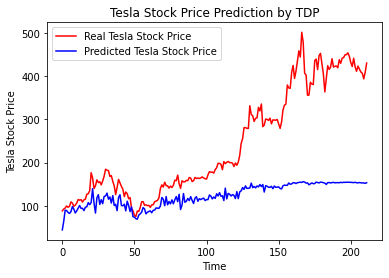

In [31]:
# Visualizing the results
# ---
#
plt.plot(real_stock_price, color='red', label='Real Tesla Stock Price')
plt.plot(predicted_stock_price, color='blue',
         label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction by TDP')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [33]:
# Model Evaluation
# ---
#
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)
print(real_stock_price.mean())

154.58821799621654
240.69449118396224


## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

The RNN model has an RMSE of 154.6 which is higher than the anticipated 10% of the target mean, however the model is still able to correctly predict the Tesla stock prices.

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

#### a) Did we have the right question?

Yes, the question is in line with the research objective

#### b) Did we have the right data?
Yes, the data was relevant in achieving the research objective

#### c) What can be done to improve the solution?
The following steps can be used to improve our model's performance:

* Getting more training data
* Increasing the timesteps
* Adding some other indicators
* Adding more LSTM layers
* Adding more neurons in the LSTM layers
